# Handwritten Character Recognition


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
print('done')

/kaggle/input/vietnamese-character/dataset.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/handwritten-characters-kv/handwritten_characters_v1_kv.csv
/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv
/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data/A_Z Handwritten Data.csv
done


## Import necessary libraries

In [2]:
# Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.optimizers import Adam, SGD
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
print('done.')

done.


In [3]:
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, RandomRotation, RandomZoom
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import random
print('done.')

done.


## Load the dataset


In [4]:
# load data
mnist_train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
mnist_test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
print('done.')

done.


In [5]:
alphabet_data = pd.read_csv("../input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv")
print('done.')

done.


In [6]:
vn_data = pd.read_csv("/kaggle/input/vietnamese-character/dataset.csv")
print('done.')

done.


In [7]:
vn_data.keys()

Index(['255', '255.1', '255.2', '255.3', '255.4', '255.5', '255.6', '255.7',
       '255.8', '255.9',
       ...
       '255.689', '255.690', '255.691', '255.692', '255.693', '255.694',
       '255.695', '255.696', '255.697', '0.35'],
      dtype='object', length=785)

In [8]:
mnist_train.keys()

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [9]:
alphabet_data.keys()

Index(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9',
       ...
       '0.639', '0.640', '0.641', '0.642', '0.643', '0.644', '0.645', '0.646',
       '0.647', '0.648'],
      dtype='object', length=785)

In [10]:
alphabet_data.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [11]:
mnist_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [12]:
# Targets unique values
alphabet_data.head

<bound method NDFrame.head of          0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  \
0        0    0    0    0    0    0    0    0    0    0  ...      0      0   
1        0    0    0    0    0    0    0    0    0    0  ...      0      0   
2        0    0    0    0    0    0    0    0    0    0  ...      0      0   
3        0    0    0    0    0    0    0    0    0    0  ...      0      0   
4        0    0    0    0    0    0    0    0    0    0  ...      0      0   
...     ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
372445  25    0    0    0    0    0    0    0    0    0  ...      0      0   
372446  25    0    0    0    0    0    0    0    0    0  ...      0      0   
372447  25    0    0    0    0    0    0    0    0    0  ...      0      0   
372448  25    0    0    0    0    0    0    0    0    0  ...      0      0   
372449  25    0    0    0    0    0    0    0    0    0  ...      0      0   

        0.641  0.642  0.643  0.64

In [13]:
# Targets unique values
vn_data['0.35'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

## Visualize data

In [14]:
alphabet_data.shape


(372450, 785)

In [15]:
mnist_train.shape

(42000, 785)

In [16]:
vn_data.shape

(105639, 785)

In [17]:
mnist_train.keys()

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [18]:
def get_info_label(data):
    labels, counts = np.unique(data, return_counts = True)
#     for l, c in zip(labels, counts):
#         print("%s : %s" %(l,c))
    return (counts, labels)

def visullize_data_by_chart(data):
    counts, labels = get_info_label(data)
    # Create the bar chart
    plt.figure(figsize=(15, 6))  # Adjust the figure size for a bar chart
    plt.style.use('fivethirtyeight')
    plt.bar(labels, counts)  # Use plt.bar for bar chart

    # Add labels and title
    plt.xlabel('Labels')
    plt.ylabel('Counts')
    plt.title('Data Visualization (Bar Chart)')

    # Optional: Add data labels (percentages) above bars
    # plt.bar(labels, counts, autopct='%1.1f%%')  # Uncomment if you want percentages

    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

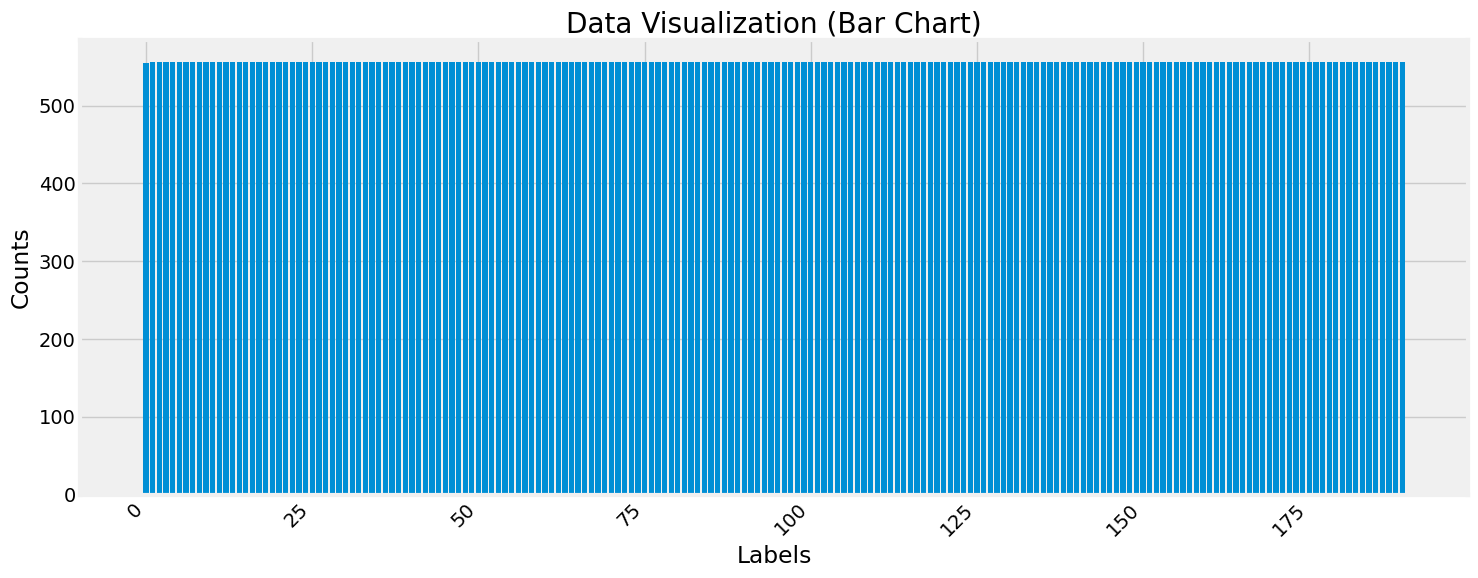

In [19]:
visullize_data_by_chart(vn_data['0.35'])

In [20]:
def show_image_for_each_class(data, label, num_images_per_class=5):
    """
    Displays multiple images per class from the provided data, ensuring efficient handling
    of large datasets and incorporating class labels.

    Args:
        data (pandas.DataFrame): The dataset containing image data and a "label" column.
        label (str): The name of the column containing class labels.
        num_images_per_class (int, optional): The number of images to display for each class.
            Defaults to 5.

    Raises:
        TypeError: If `data` is not a pandas DataFrame.
        ValueError: If `num_images_per_class` is not a positive integer.
    """

    if not isinstance(data, pd.DataFrame):
        raise TypeError("data must be a pandas DataFrame")

    # Extract unique class labels from the data
    unique_classes = data[label].unique()

    # Validate num_images_per_class
    if num_images_per_class < 1:
        raise ValueError("num_images_per_class must be a positive integer.")

    # Determine the grid layout dimensions based on total classes and images per class
    num_rows = len(unique_classes)
    num_cols = num_images_per_class

    # Create a suitable figure size that scales appropriately
    figsize = (num_cols * 2, num_rows * 2)  # Adjust figure size as needed

    # Create a subplot grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

    # Use a flat iterator to access axes efficiently
    flat_axes = axes.flatten()

    # Iterate through unique classes and display images
    for i, class_label in enumerate(unique_classes):
        class_data = data[data[label] == class_label]

        # Handle edge case where there are fewer images than requested per class
        num_images_to_show = min(num_images_per_class, len(class_data))

        for image_index in range(num_images_to_show):
            # Ensure image index stays within class data limits
            if image_index < len(class_data):
                img = np.reshape(class_data.iloc[image_index].drop(label).values, (28, 28))
                flat_axes[i * num_cols + image_index].imshow(img, cmap='gray')
                flat_axes[i * num_cols + image_index].set_title(f"Class: {class_label}")
                flat_axes[i * num_cols + image_index].axis('off')

    # Hide unused axes if there are fewer classes than expected
    for i in range(len(flat_axes) - num_rows * num_cols):
        flat_axes[-i - 1].axis('off')

    plt.tight_layout()
    plt.show()

## **For Vietnamese character**

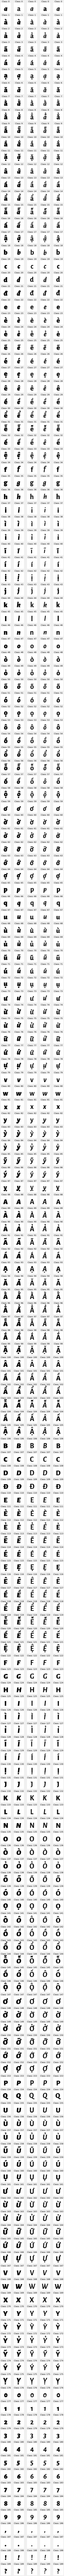

In [21]:
show_image_for_each_class(vn_data, '0.35', 5)

## **Remove unnecessary data**

In [22]:
vn_data['0.35'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

### **Remove data of class from 187 to 189**

In [23]:
vn_data = vn_data[~vn_data['0.35'].isin([186, 187, 188, 189])]
print('done!')
# Lưu lại kết quả vào một file CSV mới
# vn_data.to_csv('VietnameseOCR_filtered_v1.csv', index=False)

done!



## Merge dataset and reset label

### Đưa cột dữ liệu cuối lên làm cột đầu của vn_data

In [24]:
# Lấy cột cuối cùng
last_col = vn_data.iloc[:, -1]
# Tạo DataFrame mới với các cột còn lại
df_new = vn_data.iloc[:, :-1]
# Thêm cột cuối cùng vào đầu
df_new.insert(0, 'label', last_col)

vn_data_new = df_new
print('done!')
# Lưu lại kết quả vào một file CSV mới
# vn_data_new.to_csv('VietnameseOCR_filtered_v3.csv', index=False)

done!


In [25]:
vn_data_new['label'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

### Change label for datasets

In [26]:
vn_data_new['label'] = np.where(
    (vn_data_new['label'] >= 88) & (vn_data_new['label'] <= 175),
    vn_data_new['label'] - 88,
    np.where(
        (vn_data_new['label'] >= 176) & (vn_data_new['label'] <= 185),
        vn_data_new['label'] - 88,
        vn_data_new['label']  # Giữ nguyên các nhãn khác
    )
)
print('done!')

done!


In [27]:
get_info_label(vn_data_new['label'])

(array([1111, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112,
        1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112,
        1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112,
        1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112,
        1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112,
        1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112,
        1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112,
        1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112,
         556,  556,  556,  556,  556,  556,  556,  556,  556,  556]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74

In [28]:
word_dict = {
    0:'A',1:'B',2:'C',3:'D',
    4:'E',5:'F',6:'G',7:'H',
    8:'I',9:'J',10:'K',11:'L',
    12:'M',13:'N',14:'O',15:'P',
    16:'Q',17:'R',18:'S',19:'T',
    20:'U',21:'V',22:'W',23:'X',
    24:'Y',25:'Z',
    26:'0',27:'1',28:'2',29:'3',30:'4',
    31:'5',32:'6',33:'7',34:'8',35:'9'
}
alphabet_data['0'] = alphabet_data['0'].replace({1: 18, 2: 19, 3: 20,
                                                          4: 22, 5: 34, 6 : 35,
                                                          7: 36, 8: 37, 9 : 43,
                                                          10: 44, 11: 45,12:98, 13 : 46,
                                                          14: 47, 15: 65, 16: 66,
                                                          17: 99, 18: 100, 19 : 101,
                                                          20: 67, 21: 79, 22 : 80,
                                                          23: 81, 24: 82, 25 : 102,})
print("done")

done


In [29]:
show_some_images(mnist_train, 'label')

NameError: name 'show_some_images' is not defined

In [ ]:
show_some_images(vn_data_new, 'label')

In [ ]:
alphabet_data.keys()

In [ ]:
show_some_images(alphabet_data, '0')

In [ ]:
alphabet_data.columns = mnist_train.columns
vn_data_new.columns = mnist_train.columns
print('done')

In [ ]:
merge_data = pd.concat([alphabet_data, mnist_train, vn_data_new], axis = 0)
merge_data.shape
del alphabet_data, mnist_train, vn_data_new

In [ ]:
merge_data.keys()

In [ ]:
get_info_label(merge_data['label'])

In [ ]:
show_image_for_each_class(merge_data, 'label', 1)

### Making a list of letters with their positions¶


In [ ]:
characters = ['A', 'À', 'Ả', 'Ã', 'Á', 'Ạ', 'Ă', 'Ằ', 'Ẳ', 'Ẵ', 'Ắ', 'Ặ', 'Â', 'Ầ', 'Ẩ', 'Ẫ', 'Ấ', 'Ậ',
             'B', 'C', 'D', 'Đ', 'E', 'È', 'Ẻ', 'Ẽ', 'É', 'Ẹ', 'Ê', 'Ề', 'Ể', 'Ễ', 'Ế', 'Ệ',
             'F', 'G', 'H', 'I', 'Ì', 'Ỉ', 'Ĩ', 'Í', 'Ị', 'J', 'K', 'L', 'N', 'O', 'Ò', 'Ỏ', 'Õ', 'Ó', 'Ọ', 'Ô', 'Ồ', 'Ổ', 'Ỗ', 'Ố', 'Ộ', 'Ơ', 'Ờ', 'Ở', 'Ỡ', 'Ớ', 'Ợ',
             'P', 'Q', 'U', 'Ù', 'Ủ', 'Ũ', 'Ú', 'Ụ', 'Ư', 'Ừ', 'Ử', 'Ữ', 'Ứ', 'Ự', 'V', 'W', 'X', 'Y', 'Ỳ', 'Ỷ', 'Ỹ', 'Ý', 'Ỵ',
             '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'M', 'R', 'S', 'T', 'Z']

# Tạo từ điển
word_dict = {}
for index, char in enumerate(characters):
    word_dict[index] = char

print(len(characters))

In [ ]:
merge_data.shape

In [ ]:
print(''

### Plot the number of letters in the dataset.¶


In [ ]:
# Plotting the number of alphabets in the dataset
# 1): Firstly we convert the labels into integer values and append into the count list according to the label. 
#     This count list has the number of images present in the dataset belonging to each alphabet.
# 2): Now we create a list – alphabets containing all the characters using the values() function of the dictionary.
# 3): Now using the count & alphabets lists we draw the horizontal bar plot.

plt.style.use('fivethirtyeight')
plt.xkcd()

y_integer = np.int0(merge_data['label'])
count = np.zeros(len(merge_data['label'].unique()), dtype = 'int')
print(len(count), len(characters))

for i in y_integer:
    count[i] += 1
    
characters = []

for i in word_dict.values():
    characters.append(i)
    
fig, ax = plt.subplots(1, 1, figsize = (15, 15))
ax.bar(characters, count)

plt.ylabel('Number Of Elements..!!', fontsize = 20, fontweight = 'bold', color = 'green')
plt.xlabel('Alphabets and Number!!', fontsize = 30, fontweight = 'bold', color = 'green')
plt.grid()
plt.show()



### Generate images to make balanced data¶


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd

def generateImageLabel(df, num_images_to_generate, target_size=(28, 28), channels=1,
                       augmentation_params={
                           'zoom_range': [0.6, 1],
                           'rotation_range': 10,
                           'width_shift_range': 0.2,
                           'height_shift_range': 0.2,
                           'horizontal_flip': True
                       }):
    """
    Generate augmented images from a DataFrame.

    Args:
        df: A pandas DataFrame containing the original images and their corresponding labels.
        num_images_to_generate: The desired number of augmented images to be generated.
        target_size: The desired size of the generated images.
        channels: The number of channels in the images.
        augmentation_params: A dictionary containing the augmentation parameters.

    Returns:
        A pandas DataFrame containing the augmented images and their corresponding labels.
    """

    labels = df['label'].values
    images = df.drop('label', axis=1).values
    images = images.reshape(-1, target_size[0], target_size[1], channels)

    datagen = ImageDataGenerator(**augmentation_params)
    generated_images = []
    generated_labels = []
    generated_counts = 0

    for X_batch, y_batch in datagen.flow(images, labels, batch_size=32):
        if generated_counts >= num_images_to_generate:
            break
        generated_images.append(X_batch)
        generated_labels.append(y_batch)
        generated_counts += X_batch.shape[0]

    generated_images = np.concatenate(generated_images)
    generated_labels = np.concatenate(generated_labels)

    # Flatten images for DataFrame
    generated_images = generated_images.reshape(-1, np.prod(target_size) * channels)

    generated_df = pd.DataFrame(generated_images, columns=df.columns[1:])
    generated_df['label'] = generated_labels

    # Sample if generated too many images
    if generated_df.shape[0] > num_images_to_generate:
        generated_df = generated_df.sample(n=num_images_to_generate)

    return generated_df

### Make balanced data¶ (tạm bỏ qua)


In [ ]:
balanced_df = pd.DataFrame(columns=merge_data.columns)


In [ ]:
target_count = 4000

# Iterate over each label
for label in range(0, 103):
    print(label)
    #temp_data to calculate
    temp_data = merge_data[merge_data['label'] == label]
    print('original shape: ', temp_data.shape)
    # Sample rows for the current label to achieve the target count
    if(temp_data.shape[0] > target_count):
        sampled_rows = temp_data.sample(n=target_count)
    else:
        sampled_rows = temp_data
#     elif(temp_data.shape[0] == target_count):
#         sampled_rows = temp_data
#     else:
#         print('pass')
#         num_images_to_generate = target_count - temp_data.shape[0]
#         sampled_rows = generateImageLabel(temp_data, num_images_to_generate)
#         sampled_rows = pd.concat([temp_data, sampled_rows])
    print('sampled_rows: ', sampled_rows.shape)
    
    balanced_df = pd.concat([balanced_df, sampled_rows])

In [ ]:
balanced_df['label'].value_counts()


In [ ]:
# # Shuffle the rows to ensure randomness
# balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)
# print('done')

In [ ]:
balanced_df.isnull().sum()


In [ ]:
label_tmp = balanced_df[balanced_df['label']==21]
images_tmp = label_tmp.drop(columns=['label'],axis=1)
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(20,20))
axs = axs.flatten()
for i, ax in enumerate(axs):
    index = random.randint(0, images_tmp.shape[0])
#     _, shu = cv2.threshold(images_a.iloc[index], 30, 200, cv2.THRESH_BINARY)
    images_tmp = images_tmp.astype(np.float32)
    ax.imshow(np.reshape(images_tmp.iloc[index], (28, 28)), cmap='Greys')
plt.show()

In [ ]:
# Plotting the number of alphabets in the dataset
# 1): Firstly we convert the labels into integer values and append into the count list according to the label. 
#     This count list has the number of images present in the dataset belonging to each alphabet.
# 2): Now we create a list – alphabets containing all the characters using the values() function of the dictionary.
# 3): Now using the count & alphabets lists we draw the horizontal bar plot.

# plt.style.use('fivethirtyeight')
plt.xkcd()

y_integer = np.int0(balanced_df['label'])
count = np.zeros(103, dtype = 'int')

for i in y_integer:
    count[i] += 1
    
characters = []

for i in word_dict.values():
    characters.append(i)
    
fig, ax = plt.subplots(1, 1, figsize = (15, 15))
ax.bar(characters, count)

plt.xlabel('Number Of Elements..!!', fontsize = 20, fontweight = 'bold', color = 'green')
plt.ylabel('Alphabets and Number!!', fontsize = 30, fontweight = 'bold', color = 'green')
plt.grid()
plt.show()

In [ ]:
# Shuffle the rows to ensure randomness
# merge_data_backup = balanced_df.sample(frac=1).reset_index(drop=True)

In [ ]:
# merge_data_backup.to_csv('/kaggle/working/handwritten_characters_orion1.csv')

In [ ]:
# merge_data_backup = pd.read_csv("/kaggle/working/handwritten_characters_orion.csv")
print('done')


## Prepare dataset

In [ ]:
balanced_df.keys()

In [ ]:
X = balanced_df.drop('label', axis = 1)
y = balanced_df['label']


In [ ]:
# we are reshaping the train & test image data so that they can be displayed as an image, 
# as initially in the CSV file they were present as 784 columns of pixel data. So we convert it to 28×28 pixels.

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
x_train = np.reshape(x_train.values, (x_train.shape[0], 28, 28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28, 28))

print('Train Data Shape:', x_train.shape)
print('Test Data Shape:', x_test.shape)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
print("New shape of train data:", x_train.shape)

x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print("New shape of test data:", x_test.shape)

In [ ]:
from keras.utils import to_categorical

categorical_train = to_categorical(y_train, num_classes = len(balanced_df['label'].unique()))
print("New shape of train labels:", categorical_train.shape)

categorical_test = to_categorical(y_test, num_classes = len(balanced_df['label'].unique()))
print("New shape of test labels:", categorical_test.shape)

### Prepare data ...

## Train model

In [ ]:
print("X_test: ",x_test.shape)
print("categorical_test: ", categorical_test.shape)
del balanced_df

In [ ]:
my_model = Sequential()

my_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'valid'))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Flatten())

my_model.add(Dense(64, activation = "relu"))
my_model.add(Dense(128, activation = "relu"))

my_model.add(Dense(103, activation = "linear"))

## Compiling the Model¶


In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy
my_model.compile(optimizer = 'adam', loss = CategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
print('done')

In [ ]:
import psutil

# システムの仮想メモリ情報を取得
mem = psutil.virtual_memory()
print(f'Total memory: {mem.total}')
print(f'Available memory: {mem.available}')
print(f'Used memory percentage: {mem.percent}%')

In [ ]:
print('done')
from tensorflow.keras.utils import to_categorical

# Assuming categorical_train is a list of integer labels
categorical_train = to_categorical(categorical_train, num_classes=103)

# Verify the output
print(categorical_train.shape)  # Should be (number of samples, number of classes)
print(categorical_train[0])  # Should be a one-hot vector

# Train the model
history = my_model.fit(x_train, categorical_train,
                       epochs=10,
                       batch_size=256,
                       validation_data=(x_test, categorical_test))

In [ ]:
my_model.summary()


In [ ]:
print(history.history.keys())
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
# plt.show()
# "Loss"
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### make predictions on the test data¶


In [ ]:
plt.style.use('fivethirtyeight')
plt.xkcd()

fig, axes = plt.subplots(5, 5, figsize = (20, 20))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = np.reshape(x_test[i], (28, 28))
    ax.imshow(img, cmap = 'Greys')
    
    pred = word_dict[np.argmax(categorical_test[i])]
    ax.set_title("Prediction: " + pred, fontsize = 20, fontweight = 'bold', color = 'red')
    ax.grid()

### Evalueate

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
def print_confusion_matrix(y_true, y_pred, report=True):
#     print(y_true[:5])
#     print(y_pred[:5])
    plt.figure(figsize=(25,25))
    labels = sorted(word_dict.keys())
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = my_model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)
y_true = y_test
# y_pred = [word_dict[val] for val in y_pred]
# y_true = [word_dict[val] for val in y_true]
print_confusion_matrix(y_true, y_pred)

In [ ]:
print("Confusion Matrix:")
confusion_matrix(y_true, y_pred)

In [ ]:
my_model.save('/kaggle/working/handwritten_classifier_kieuv12.hdf5')
print('done')


In [ ]:
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# print('meo')
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# print('meo')
# tflite_quantized_model = converter.convert()
# print('meo')
# open('/kaggle/working/handwritten_classifier_v2.tflite', 'wb').write(tflite_quantized_model)

In [ ]:
# import tensorflow as tf

# # Tải mô hình Keras
# model = tf.keras.models.load_model('/kaggle/working/handwritten_classifier_v2.keras')
# model.save('/kaggle/working/handwritten_classifier_v25.hdf5', include_optimizer=False)

# # converter = tf.lite.TFLiteConverter.from_keras_model(model)

# # converter.optimizations = [tf.lite.Optimize.DEFAULT]

# # tflite_quantized_model = converter.convert()

# # open('/kaggle/working/handwritten_classifier_v2.tflite', 'wb').write(tflite_quantized_model)
# # print('Mô hình TFLite đã được lưu thành công.')


In [ ]:
# import tensorflow as tf

# converter = tf.lite.TFLiteConverter.from_keras_model(my_model)
# tflite_model = converter.convert()

# with open("/kaggle/working/handwritten_classifier_model_kv.tflite", "wb") as tflite_file:
#     tflite_file.write(tflite_model)
    
# print('done')